In [1]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
    
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
rf_proba = rf.predict_proba(x_test)[:, 1]
lr_proba = lr.predict_proba(x_test)[:, 1]

- Calculate calibration curves

In [7]:
rf_fraction_of_positives, rf_mean_predicted_value = calibration_curve(y_test, rf_proba, n_bins=10)

lr_fraction_of_positives, lr_mean_predicted_value = calibration_curve(y_test, lr_proba, n_bins=10)

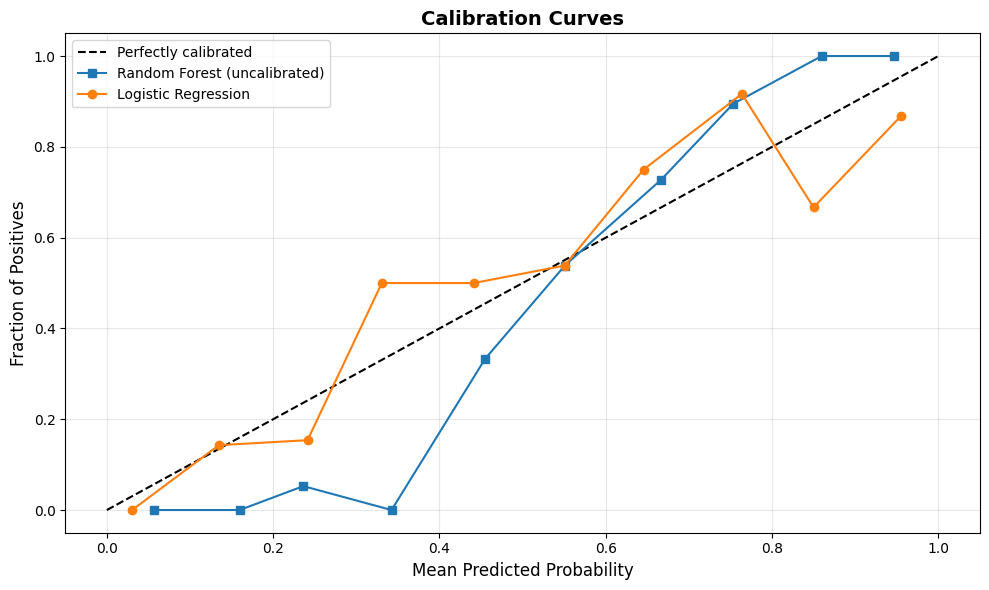

In [9]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.plot(rf_mean_predicted_value, rf_fraction_of_positives, 
         's-', label='Random Forest (uncalibrated)')
plt.plot(lr_mean_predicted_value, lr_fraction_of_positives, 
         'o-', label='Logistic Regression')
plt.xlabel('Mean Predicted Probability', fontsize=12)
plt.ylabel('Fraction of Positives', fontsize=12)
plt.title('Calibration Curves', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- Calculate Brier score (lower is better, 0 = perfect)

In [10]:
from sklearn.metrics import brier_score_loss

rf_brier = brier_score_loss(y_test, rf_proba)
lr_brier = brier_score_loss(y_test, lr_proba)

print(f"Brier Score (lower is better):")
print(f"  Random Forest: {rf_brier:.4f}")
print(f"  Logistic Regression: {lr_brier:.4f}")

Brier Score (lower is better):
  Random Forest: 0.0763
  Logistic Regression: 0.1296
